In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

import numpy as np
import pandas as pd

import matplotlib as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import nltk
import seaborn as sns
from nltk.corpus import stopwords

C:\Users\Alex\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Alex\anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\Users\Alex\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df=pd.read_csv('Новая выгрузка обр.csv', encoding="cp1251")
df = df.drop(['Адресат'], axis = 1)

In [3]:
df['Количество слов'] = df['Содержание'].apply(lambda x: len(str(x).split(' ')))

In [4]:
df

,Автор,Место работы автора,Специализация адресата,Содержание,Примечание,Количество слов
0,Антонова С.В.,АО «Интерфакс»,Генеральный директор,возможн использован сетев издан информацион ре...,,9
1,Картошкин С.А.,Министерство просвещения Российской Федерации,Генеральный директор,участ совещан вопрос доработк фэ предоставлен ...,,15
2,Цивилев С.Е.,Администрация Кемеровской области,Генеральный директор,командирован саликов к. глушк д. участ заседан...,,16
3,Волков Г.А.,Министерство транспорта Российской Федерации,Административный директор,участ чемпионат мир профессиональн мастерств с...,,10
4,Атанов И.В.,Ставропольский государственный аграрный универ...,Генеральный директор,участ церемон открыт вузовск чемпионат 15 апр ...,,11
...,...,...,...,...,...,...
4887,Запруднова Е.В.,Администрация Владимирской области,Генеральный директор,присутств школьник миров чемпионат казан предп...,переда митькин а. т.к. ответ е письм,6
4888,Черноскутова И.А.,Министерство образования и науки Российской Фе...,Генеральный директор,заседан рабоч групп приоритетн проект рабоч ка...,,9
4889,Медведев Д.А.,Аппарат Правительства Российской Федерации,Генеральный директор,протокол заседан президиум совет президент рф ...,,10
4890,Синюгина Т.Ю.,Министерство образования и науки РФ. Заместите...,Генеральный директор,проведен 21.11.2017 заседан организацион комит...,,20


In [5]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

Text(0, 0.5, 'Number of tweets')

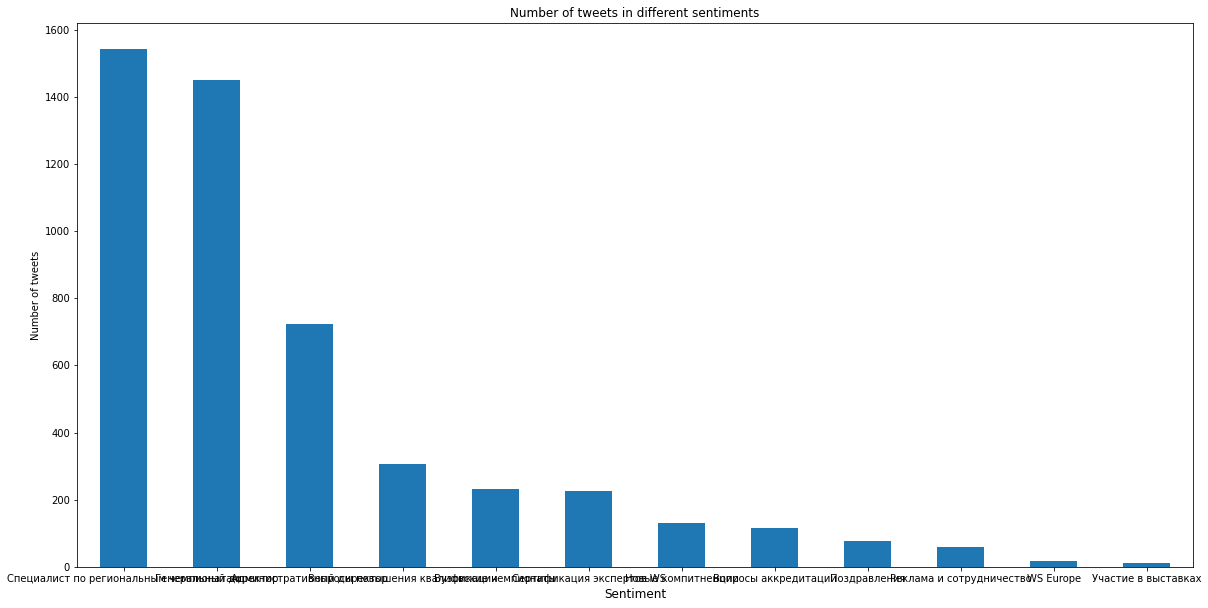

In [15]:
df['Специализация адресата'].value_counts().plot.bar(figsize=(20,10))
plt.xticks(rotation=None)
plt.title('Number of tweets in different sentiments',fontsize=12)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of tweets')

In [16]:
# Визуализируем наиболее популярные слова из датасета с помощью worldcloud
text = df['Содержание'].values
wordcloud = WordCloud(max_words=500,background_color='white', colormap='rainbow',height=300)
wordcloud.generate(str(text))

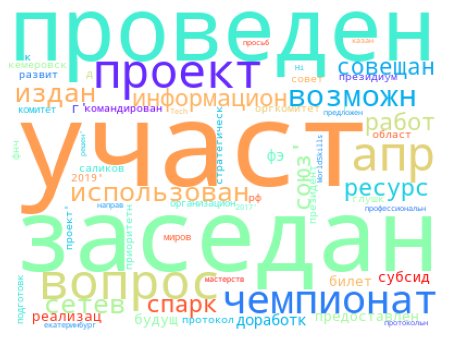

In [17]:
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(10)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [42]:
# Выведем топ-20 слов позитивных комментариев
text = df[df['Специализация адресата'].str.contains("Специалист по региональным чемпионатам")]['Содержание'].values
wordcloud = WordCloud(max_words=4,background_color='white', colormap='rainbow',height=300)
wordcloud.generate(str(text))
text

array(['участ проект билет будущ 2019 г',
       'участ проект билет будущ 2019 г',
       'корректировк перечн компетенц демонстрацион экзам стандарт ворлдскиллс росс 2019 год',
       ..., 'согласован включен соста комисс кадылев ж.м',
       'приглашен заседан оргкомитет 14 ноябр 2017 год 15:00',
       'предоставлен информац топ-50 професс'], dtype=object)

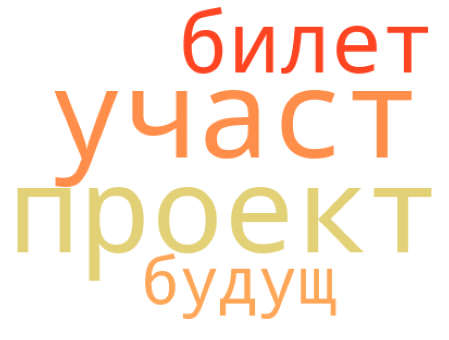

In [43]:
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(10)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [44]:
# Выведем топ-20 слов позитивных комментариев
text = df[df['Специализация адресата'].str.contains("Участие в выставках")]['Содержание'].values
wordcloud = WordCloud(max_words=4,background_color='white', colormap='rainbow',height=300)
wordcloud.generate(str(text))
text

array(['приглашен семинар знакомств пакистан 26 март 2019г',
       'участ руководител колледж преподавател эксперт программ миров чемпионат профмастерств WorldSkills Kazan 2019',
       'виз руководств WorldSkills Europe 4 апрел 2019 год',
       'виз президент WorldSkills Europe',
       'предварительн состав делегац чемпионат европ',
       'оказан поддержк организац мероприят',
       'согласован проект соглашен проведен чемпионат EuroSkills 2022',
       'принят иностра делегац состав представител WorldSkills Japan 2018',
       'готовн проведен встреч',
       'организац встреч представител WorldSkills Korea',
       'заявочн книг прав проведен чемпионат европ EuroSkills 22',
       'участ конгресс образовательн технолог'], dtype=object)

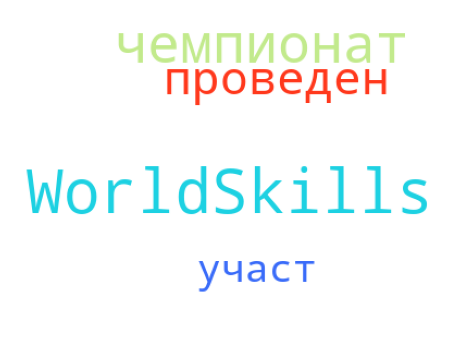

In [45]:
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(10)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()